In [21]:
import os
import json

import torch
import matplotlib.pyplot as plt
import pandas as pd

import tqdm

from model import FRCNNDetector, DetectedImage
import dataset as DS

In [22]:
classes = ['1', '2', '3', '4', '5', 'blue', 'brown', 'green', 'red', 'yellow', 'parking', 'limit_h', 'limit_speed' ,'14', '15']
model_path = "./fasterrcnn_20231119.pt-35"
detector = FRCNNDetector(classes, model_path=model_path)

In [23]:
data_set_path = "./all_data/val"
# test_loader = DS.load_dataset(data_set_path, "target_2048_2448.json")
test_loader = DS.load_dataset(data_set_path, "target_2452_2056.json", batch_size=1)

In [24]:
gts = []
predicts = []
count = 0
with torch.no_grad():
    detector.eval()
    for images, targets in tqdm.tqdm(test_loader):

        for target in targets:
            n_boxes = len(target["boxes"])
            target["scores"] = torch.Tensor([1.]*n_boxes)

        gts.extend(
            [DetectedImage(image, out, classes=classes) for image, out in zip(images, targets)]
        )

        predicts.extend(detector.predict(images))
        print(detector(images))
        
        count += 1
        if count==1:
            break
        

  0%|          | 0/183 [00:00<?, ?it/s]

[{'boxes': tensor([[2.0697e+02, 8.8516e+02, 2.8846e+02, 1.0242e+03],
        [1.3173e+03, 8.4404e+02, 1.3988e+03, 9.8303e+02],
        [1.1117e+03, 8.4404e+02, 1.1932e+03, 9.8303e+02],
        [8.6495e+02, 8.4405e+02, 9.4644e+02, 9.8303e+02],
        [8.2382e+02, 8.4405e+02, 9.0532e+02, 9.8303e+02],
        [8.3598e+01, 8.8517e+02, 1.6509e+02, 1.0242e+03],
        [7.8270e+02, 8.4405e+02, 8.6419e+02, 9.8303e+02],
        [1.2472e+02, 8.8517e+02, 2.0621e+02, 1.0241e+03],
        [7.4158e+02, 1.0496e+03, 8.2307e+02, 1.1886e+03],
        [4.2477e+01, 8.8517e+02, 1.2396e+02, 1.0241e+03],
        [1.6585e+02, 8.8517e+02, 2.4733e+02, 1.0241e+03],
        [8.3601e+01, 1.2964e+03, 1.6508e+02, 1.4353e+03],
        [2.3043e+03, 8.4404e+02, 2.3858e+03, 9.8302e+02],
        [4.2478e+01, 1.2964e+03, 1.2396e+02, 1.4353e+03],
        [7.4158e+02, 8.4405e+02, 8.2306e+02, 9.8302e+02],
        [9.0608e+02, 8.4404e+02, 9.8757e+02, 9.8302e+02],
        [1.3553e+00, 1.2964e+03, 8.2834e+01, 1.4353e+03],
   

  0%|          | 0/183 [00:04<?, ?it/s]


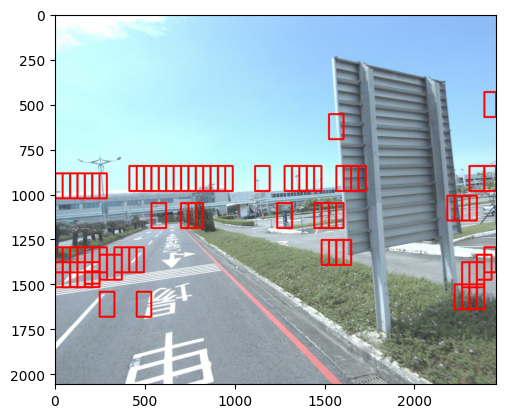

In [25]:
detected_image = predicts[0]
img = detected_image.draw_box("green", thickness=10, score_thr=.7)
plt.imshow(img)

140535180614768
140535180614768


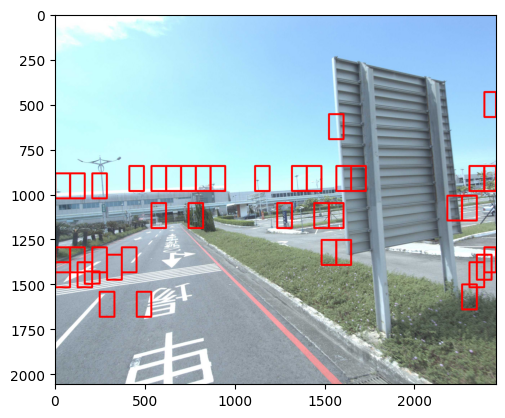

In [26]:
tmp = detected_image.nms_filtering(.3)
print(id(tmp._ref_image))
print(id(detected_image._ref_image))
img = tmp.draw_box("green", thickness=10, score_thr=.7)
plt.imshow(img)

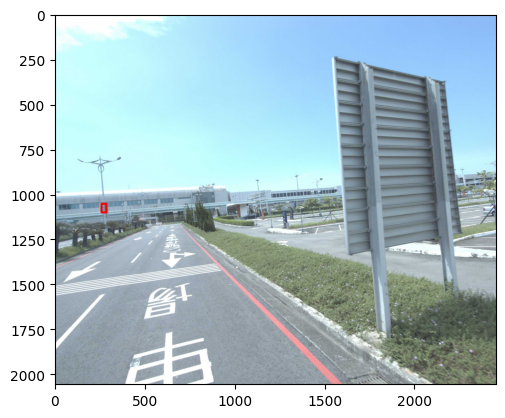

In [27]:
img = gts[0].draw_box("green", thickness=10)
plt.imshow(img)